# **Harry Potter Universe: A Social Network Analysis**

**Contents:**


*   Detailed Description of Network
*   Network Properties
*   Distribution Plots
*   Identifying Most Important Nodes
*   Network Visualizations
*   Network Type





## **1. Detailed Description of Network**
* Number of nodes
* Number of links
* Type of network

Examined dataset (textual data transformed): https://github.com/shecodespython/harry-potter-network-analysis

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
HP = nx.read_edgelist("/content/drive/MyDrive/SNA/merged_network.csv",
                      delimiter=",",
                      nodetype=str,
                      data=[('weight', str)],
                      create_using=nx.Graph())

Nodes and Links

In [ ]:
len(HP.nodes()), len(HP.edges())

(254, 606)

In [ ]:
nx.is_directed(HP)

False

In [ ]:
nx.is_weighted(HP)

True

The Harry Potter real dataset has **254 nodes** and **606 links**. As we can see, the network is **undirected** but it is **weighted**.

The **nodes** here are all the **characters** that appear throughout the whole Harry Potter book series (all 7 books), and **links** are the **relationships between them**. The links are based on whether two characters appear in a window of five sentences in the text (the text version of the respective book). The **weight** values are established based on **how many times a certain pair appears** in the before-mentioned context.

## **2. Network Properties - Microscale Analysis**

* Diameter
* Connected components
* Average degree
* Average shortest path
* Average Clustering Coefficient
* Assortativity Coefficient

**Diameter**

In [ ]:
diameter = nx.diameter(HP)

NetworkXError: Found infinite path length because the graph is not connected

We encountered a 'NetworkXError' when trying to compute the diameter of the graph, suggesting that the **graph is not connected**, meaning there are nodes in the graph that are not reachable from each other.

In [ ]:
nx.is_connected(HP)

False

To resolve this matter, we need to find the largest connected component to work with that from this moment on.

In [ ]:
num_components = nx.number_connected_components(HP)
num_components

11

In [ ]:
component_sizes = [len(component) for component in nx.connected_components(HP)]
component_sizes

[2, 232, 2, 2, 2, 2, 3, 2, 2, 2, 3]

There are 11 connected components, most of them only connecting to 2-3 nodes. This means, that the largest connected component will be the one with 232 as component size.

In [ ]:
average_degree = sum(dict(HP.degree()).values()) / len(HP)
average_degree

4.771653543307087

An average degree of 4.77 reinforces that most nodes have around 2 to 3 connections to other nodes in the network.

Now, we can extract the **largest connected component** and focus our analysis on this particular component and analyze its properties separately.

In [ ]:
largest_component = max(nx.connected_components(HP), key=len)
largest_subgraph = HP.subgraph(largest_component)

In [ ]:
len(largest_component)

232

As we suspected, the one with size 232 is the largest connected component.

In [ ]:
HPC = largest_subgraph

In [ ]:
len(HPC.nodes()), len(HPC.edges())

(232, 594)

Our **HPC** graph is still large enough for the analysis, it has **232 nodes** and **594 links**.

**Network Properties of graph HPC (largest subgraph)**

Diameter

In [ ]:
diameter = nx.diameter(HPC)
diameter

9

In the context of this network representing characters of the Harry Potter Universe connected by character relationships, the diameter of 9 would mean that the longest shortest path between any two characters in terms of the number of relationships you have to traverse is 9, meaning that the longest chain of character relationships connecting any two character in the network would have 9 links.

Social networks in real life often have diameters ranging from 3 to 7. So, a diameter of 9 in our Harry Potter social network might indicate that the network is relatively large or more complex than typical **real-world social networks**.

In a completely **random network**, the diameter tends to increase logarithmically with the number of nodes. So, a diameter of 9 could indicate a relatively.

**Scale-free networks**, like many real-world networks, often exhibit small diameters despite their large size. They typically have a few highly connected nodes that enable efficient information flow across the network. In our Harry Potter network, a diameter of 9 might be relatively high for such a network.

**Small-world networks** have relatively short path lengths between nodes compared to regular random networks. A diameter of 9 might be considered moderate, indicating some degree of small-world behavior.

Average Degree

In [ ]:
avg_degree = sum(dict(HPC.degree()).values()) / len(HPC)
avg_degree

5.120689655172414

In our new network HPC, the average degree is around 5.12, meaning that each node has around 5 connections to other nodes.

In many **real-world social networks**, the average degree varies widely depending on factors like the size of the network and the nature of social interactions. However, in small to medium-sized social networks, an average degree of 5.12 could be considered moderate, indicating that characters have several connections, but it's not excessively high.

In a **random network**, the average degree is often quite uniform across nodes. An average degree of 5.12 in our Harry Potter social network could indicate that it's more structured or organized than a completely random network.

**Scale-free networks** are characterized by having a few highly connected nodes and many nodes with few connections. An average degree of 5.12 might suggest that our network does not exhibit strong scale-free characteristics.

An average degree of 5.12 could contribute to the **small-world property**, particularly if coupled with a moderate clustering coefficient and a relatively short average path length.

Average Shortest Path

In [ ]:
avg_shortest_path = nx.average_shortest_path_length(HPC)
avg_shortest_path

3.5300417972831766

 In many **real-world social networks**, the average shortest path tends to be relatively short, typically ranging from 3 to 7. An average shortest path of 3.53 in our Harry Potter social network could indicate that characters are relatively closely connected, suggesting a high level of interaction and communication within the network.

 In a completely **random network**, the average shortest path tends to increase logarithmically with the number of nodes. An average shortest path of 3.53 could suggest that our network is not completely random, as random networks often have longer average shortest paths.

**Scale-free networks** often exhibit short average shortest paths despite their large size, due to the presence of highly connected nodes that facilitate efficient information flow. An average shortest path of 3.53 could indicate that our network has some scale-free properties.

An average shortest path of 3.53 would align with the **small-world property**, suggesting that our Harry Potter social network enables efficient communication and information dissemination between characters.

Average Clustering Coefficient

In [ ]:
nx.average_clustering(HPC)

0.16868414571354406

In many **real-world social networks**, the clustering coefficient tends to be relatively high, often exceeding 0.2 or even 0.3. A value of 0.17 suggests that while there is some clustering in our Harry Potter social network, it may not be as tightly knit as some real-world social networks.

In a completely **random network**, the average clustering coefficient tends to be very low. Random networks lack the tendency for nodes to form clusters or communities. Therefore, an average clustering coefficient of 0.17 in our network indicates that there is indeed some degree of non-randomness in the connections between characters.

**Scale-free networks** often exhibit high clustering coefficients due to the presence of highly connected nodes that form clusters around them. An average clustering coefficient of 0.17 could suggest that this network does not strongly exhibit scale-free properties, as the clustering coefficient is relatively modest.

An average clustering coefficient of 0.17 aligns with the **small-world property**, indicating some degree of local clustering despite relatively short average shortest paths between characters.

Assortativity Coefficient

In [ ]:
nx.degree_assortativity_coefficient(HPC)

-0.028283631710740935

The assortativity coefficient quantifies the tendency of nodes in a network to connect to other nodes that are similar in some way. For **real-world networks**, a negative assortativity coefficient suggests disassortative mixing, meaning nodes with different characteristics are more likely to connect to each other.

In a completely **random network**, the assortativity coefficient is typically close to zero, indicating no particular preference for nodes to connect based on any characteristic. A negative assortativity coefficient in our network suggests that there is some level of non-randomness in the connections, where nodes with different characteristics tend to connect.

**Scale-free networks** often exhibit assortative mixing, where nodes with similar characteristics tend to connect to each other. A negative assortativity coefficient might suggest that our network does not strongly exhibit scale-free properties, as it indicates a tendency for nodes with different characteristics to connect.

**Small-world networks** can have assortativity coefficients that vary depending on their specific characteristics. In this Harry Potter social network, a negative assortativity coefficient could indicate that despite the short average shortest paths, there's a tendency for characters with different characteristics to connect, contributing to the overall small-world property of the network.

-------------------------------------------------------------------------------------------------------------

**In summary,**



*   The network has a relatively large diameter of 9, indicating that it may not be as tightly connected as some real-world social networks.
*   The average degree of 5.12 suggests a moderate level of connectivity, with characters having several connections on average.
*   The average shortest path value of 3.53 indicates relatively efficient communication and information flow between characters.
*   The average clustering coefficient of 0.17 suggests some degree of local clustering within the network.
*   The assortativity coefficient value of -0.028 indicates disassortative mixing, where characters with different characteristics are more likely to connect.


Considering these characteristics, **the network exhibits properties of a small-world network**. It has short average shortest paths, indicating efficient communication, and some degree of local clustering, reflecting the formation of communities or groups within the network. Additionally, the disassortative mixing suggests diverse interactions across different groups or characteristics, which is characteristic of small-world networks where there's a balance between local clustering and global connectivity.

## **3. Distributions Plotting**

*   Degree Distribution
*   Clustering Coefficient Distribution
*   Degree Centrality Distribution
*   Betweennes Centrality Distribution
*   Eigenvector Centrality Distribution
*   Connected Component Size Distribution

In [ ]:
import collections

We can define some color palettes to use moving forward for our plots. These are constructed with the colors of the famous Hogwarts Houses.

In [ ]:
griff_colors = ['#740001', '#ae0001', '#eeba30', '#d3a625']
slyth_colors = ['#1a472a', '#2a623d', '#5d5d5d', '#aaaaaa']
raven_colors = ['#0e1a40', '#222f5b', '#bebebe', '#946b2d']
huff_colors = ['#ecb939', '#f0c75e', '#726255', '#372e29']

**Degree Distribution**

[56, 28, 25, 22, 21, 20, 18, 18, 17, 17, 17, 16, 14, 14, 14, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


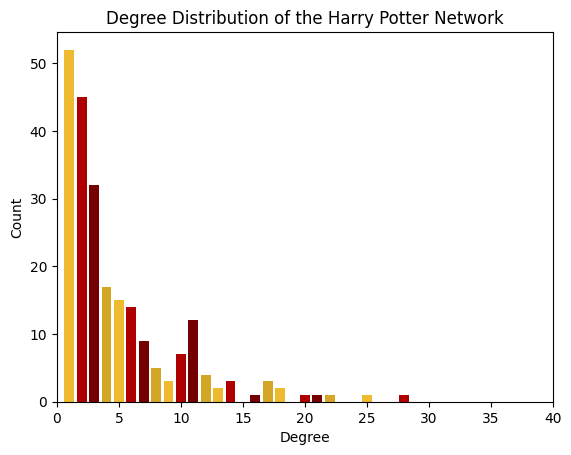

<Figure size 640x480 with 0 Axes>

In [ ]:
degree_sequence = sorted([d for n, d in HPC.degree()], reverse=True)
print(degree_sequence)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color=griff_colors)
plt.title("Degree Distribution of the Harry Potter Network")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xlim(0, 40)
plt.show()
plt.savefig('degree_distribution.png')

This visualization gives insight into the distribution of node degrees within the network, which is useful for analyzing the **structure of the network**.

The **decreasing trend** in the histogram indicates that as the degree value increases, the number of nodes with that degree decreases. This suggests that there are fewer nodes with higher degrees, which could indicate the presence of a **few hubs** or highly connected nodes, but they are relatively rare compared to the nodes with degree one.

Based on this degree distribution plot, the network **resambles the scale-free network structure**, which would have a long tail on the right with a few highly connected hubs.

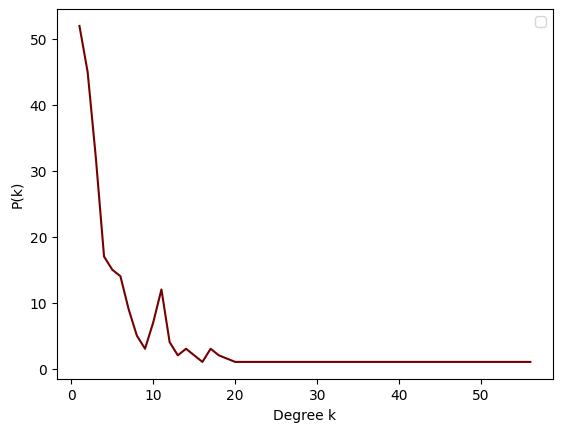

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(deg, cnt, griff_colors[0])
plt.legend()
plt.xlabel('Degree k')
plt.ylabel('P(k)')
plt.show()
plt.savefig('degree_distribution2.png')

The x-axis represents the **degrees (k)** of nodes in the graph, and the y-axis represents the **probability distribution P(k)** (or the count of nodes with each degree normalized by the total number of nodes).

The **abrupt decrease** in the plot between degrees 1 and 5 indicates that there are many nodes in the network with low degrees, particularly degree 1. After the initial sharp decline, the plot becomes **almost horizontal** (after a few protuisons), indicating that the number of nodes with higher degrees remains relatively constant.

The shape of the plot suggests a **scale-free network**, common in many real-world networks like social networks and the internet.

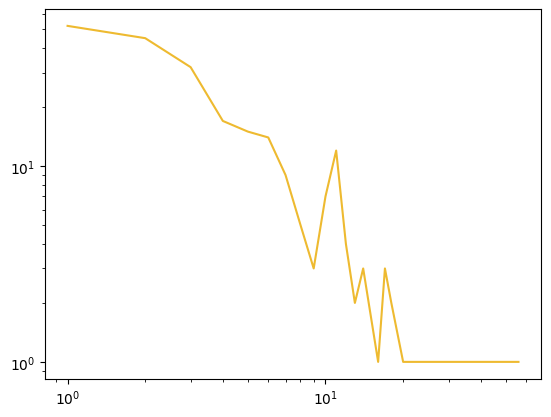

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.loglog(deg, cnt, griff_colors[2])
plt.show()
plt.savefig('degree_distribution3.png')

We can visalize the same thing on a **logarithmic scale** as well.

**Clustering Coefficient Distribution**

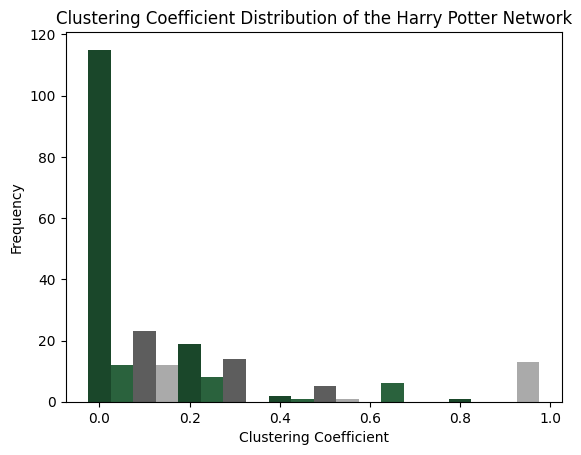

<Figure size 640x480 with 0 Axes>

In [ ]:
clust_coeff = nx.clustering(HPC)
num_bins = 20
hist, bin_edges = np.histogram(list(clust_coeff.values()), bins=num_bins)
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), color=slyth_colors)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution of the Harry Potter Network')
plt.show()
plt.savefig('clustering_coeff_distribution.png')

Each bin represents a **range of clustering coefficients**, and the height of each bar represents the number of nodes with a clustering coefficient falling within that range.

The very **tall first bar** indicates that there is a large number of nodes in our network with a very **low clustering coefficient**, but they are, in fact, a few nodes that tend to form clusters with other nodes.


**Degree Centrality Distribution**

Degree centrality is a measure of the importance of a node in a graph based on the number of edges (or connections) it has.

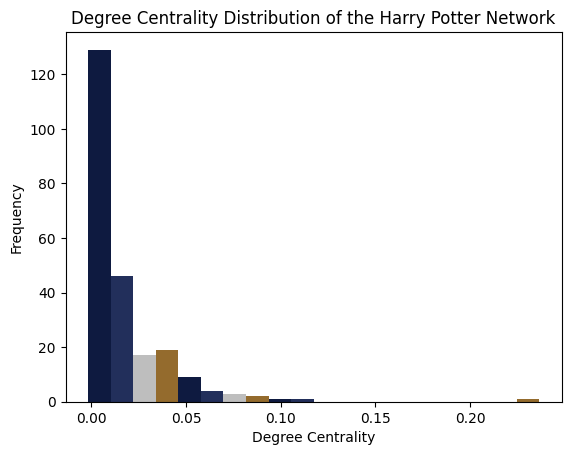

<Figure size 640x480 with 0 Axes>

In [ ]:
degree_centrality = nx.degree_centrality(HPC)
num_bins = 20
hist, bin_edges = np.histogram(list(degree_centrality.values()), bins=num_bins)
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), color=raven_colors)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Distribution of the Harry Potter Network')
plt.show()
plt.savefig('degree_centrality_distribution.png')

The x-axis represents the **degree centrality values**, which range from **0 to 1**. Nodes with a degree centrality of 0 have **no connections**, while nodes with a degree centrality of 1 are **fully connected** to all other nodes.

The **tall bar at the lower end** of the x-axis indicate that there is a large number of nodes in the network with **low degree centrality**. These nodes are likely located on the **periphery of the network** and have fewer connections compared to central nodes.

That node that has a degree centrality of around **0.25** is probably the main character, **Harry Potter**, who is connected to the most other characters.

**Betweenness Centrality Distribution**

Betweenness centrality is a measure of a node's importance based on the number of shortest paths that pass through it. Nodes with high betweenness centrality often act as bridges between different parts of the network.

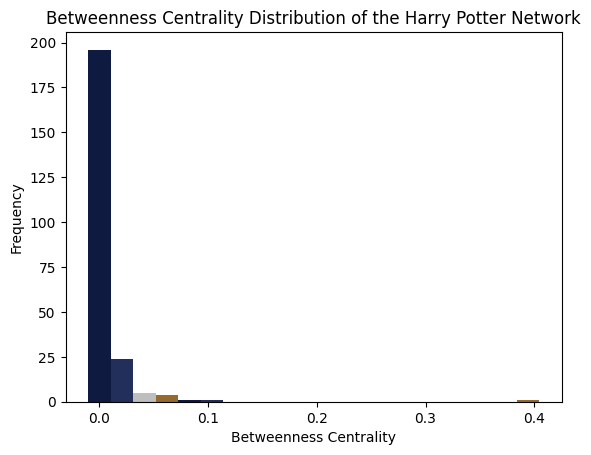

<Figure size 640x480 with 0 Axes>

In [ ]:
between_centrality = nx.betweenness_centrality(HPC)
num_bins = 20
hist, bin_edges = np.histogram(list(between_centrality.values()), bins=num_bins)
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), color=raven_colors)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality Distribution of the Harry Potter Network')
plt.show()
plt.savefig('betweenness_centrality_distribution.png')

The x-axis represents the **betweenness centrality values**, which typically range from **0 to 1**. Higher values indicate nodes that act as **important bridges** or connectors between different parts of the network.

The **tall bar** at the lower end of the x-axis indicate that there is a large number of nodes in our network with **low betweenness centrality**.

Nodes with **higher betweenness centrality** are often crucial for maintaining **efficient communication** between different parts of the network.

**Eigenvector Centrality Distribution**

Eigenvector centrality measures the influence of a node in a network by considering both its direct connections and the importance of its neighbors.

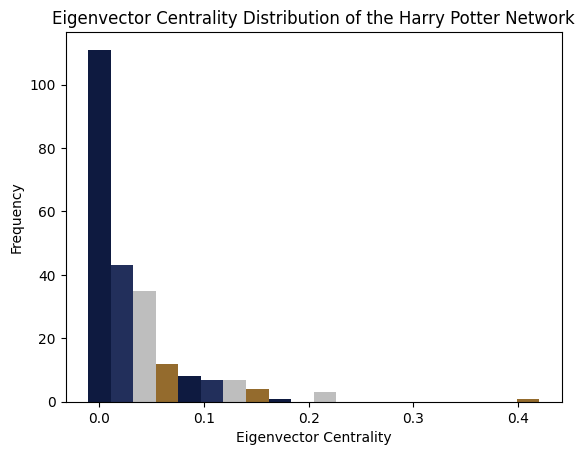

<Figure size 640x480 with 0 Axes>

In [ ]:
eigen_centrality = nx.eigenvector_centrality(HPC)
num_bins = 20
hist, bin_edges = np.histogram(list(eigen_centrality.values()), bins=num_bins)
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), color=raven_colors)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality Distribution of the Harry Potter Network')
plt.show()
plt.savefig('eigenvector_centrality_distribution.png')

This histogram also shows a **similar** shape.

**Connected Components Size Distribution**

In [ ]:
nx.is_connected(HPC)

True

In [ ]:
nx.is_connected(HP)

False

There is no point in plotting the connected components size distribution for the HPC network since it is all connected, so we are going to conduct this part of the analysis on the **HP network**.

In [ ]:
connected_components = nx.connected_components(HP)
component_sizes = [len(comp) for comp in connected_components]
component_sizes.sort(reverse=True)

component_count = {}
for size in component_sizes:
    if size in component_count:
        component_count[size] += 1
    else:
        component_count[size] = 1

In [ ]:
print("Connected Components Distribution:")
for size, count in component_count.items():
    print(f"Size {size}: {count} component(s)")

Connected Components Distribution:
Size 232: 1 component(s)
Size 3: 2 component(s)
Size 2: 8 component(s)


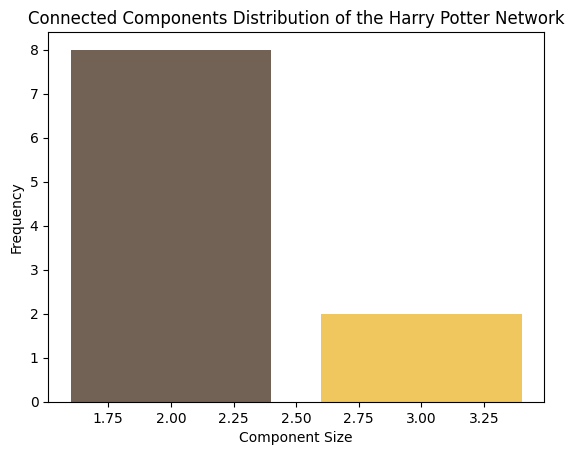

<Figure size 640x480 with 0 Axes>

In [ ]:
keys_to_plot = list(component_count.keys())[1:]
values_to_plot = list(component_count.values())[1:]
plt.bar(keys_to_plot, values_to_plot, color=huff_colors[1:3])
plt.xlabel('Component Size')
plt.ylabel('Frequency')
plt.title('Connected Components Distribution of the Harry Potter Network')
plt.show()
plt.savefig('connected_comp_distribution.png')

We **took the HPC from the plot** because it is very big compared to the rest, and nothing visible would have been displayed.

## **4. Identifying Most Important Nodes**

To identify the most important nodes of the network, I will be comparing the top 10 nodes according to the following centrality measures:

* Degree Centrality
* Betweenness Centrality
* Closeness Centrality
* Eigenvector Centrality
* PageRank Centrality
* Harmonic Centrality
* Load Centrality

In [ ]:
len(HPC.nodes()), len(HPC.edges())

(232, 594)

**Comparing different centrality measures to find the most important nodes**

**Degree Centrality**
* Degree centrality measures the number of edges connected to a node.
* Nodes with higher degree centrality are more connected within the network, indicating a higher level of influence or importance. In a social network, nodes with high degree centrality may represent individuals with many connections or friends.
* In our particular case, if a node has a high degree centrality, it means that the given character has some kind of a relationship with many others, making him/her more important in the storyline.

In [ ]:
degree_cent= nx.degree_centrality(HPC)
degree_cent

{'Adalbert Waffling': 0.012987012987012988,
 'Bathilda Bagshot': 0.047619047619047616,
 'Miranda Goshawk': 0.012987012987012988,
 'Newt Scamander': 0.008658008658008658,
 'Adrian Pucey': 0.017316017316017316,
 'George Weasley': 0.06060606060606061,
 'Lee Jordan': 0.09090909090909091,
 'Marcus Flint': 0.030303030303030304,
 'Terence Higgs': 0.008658008658008658,
 'Agatha Timms': 0.008658008658008658,
 'Ludo Bagman': 0.05627705627705628,
 'Roddy Pontner': 0.008658008658008658,
 'Aidan Lynch': 0.008658008658008658,
 'Connolly': 0.008658008658008658,
 'Quigley': 0.012987012987012988,
 'Albus Dumbledore': 0.08658008658008658,
 'Augusta Longbottom': 0.004329004329004329,
 'Avery': 0.025974025974025976,
 'Billy Stubbs': 0.004329004329004329,
 'Charity Burbage': 0.008658008658008658,
 'Dobby': 0.09523809523809523,
 'Draco Malfoy': 0.10822510822510822,
 'Gellert Grindelwald': 0.008658008658008658,
 'Griselda Marchbanks': 0.012987012987012988,
 'Harry Potter': 0.24242424242424243,
 'Karkus': 0.0

In [ ]:
for u, v, data in HPC.edges(data=True):
    data['weight'] = float(data.get('weight', 1))

**Weighted Degree Centrality**

In [ ]:
len(HPC.nodes())

232

In [ ]:
degree_cent = HPC.degree(weight='weight')
degree_cent = dict(degree_cent)
degree_cent = {node: centrality / (len(HPC.nodes()) - 1) for node, centrality in degree_cent.items()}
degree_cent

{'Adalbert Waffling': 0.0735930735930736,
 'Bathilda Bagshot': 0.24242424242424243,
 'Miranda Goshawk': 0.0735930735930736,
 'Newt Scamander': 0.05194805194805195,
 'Adrian Pucey': 0.09090909090909091,
 'George Weasley': 0.36796536796536794,
 'Lee Jordan': 0.44155844155844154,
 'Marcus Flint': 0.1471861471861472,
 'Terence Higgs': 0.025974025974025976,
 'Agatha Timms': 0.03896103896103896,
 'Ludo Bagman': 0.4025974025974026,
 'Roddy Pontner': 0.03896103896103896,
 'Aidan Lynch': 0.04329004329004329,
 'Connolly': 0.047619047619047616,
 'Quigley': 0.06060606060606061,
 'Albus Dumbledore': 0.6060606060606061,
 'Augusta Longbottom': 0.004329004329004329,
 'Avery': 0.16017316017316016,
 'Billy Stubbs': 0.008658008658008658,
 'Charity Burbage': 0.017316017316017316,
 'Dobby': 6.246753246753247,
 'Draco Malfoy': 0.6406926406926406,
 'Gellert Grindelwald': 0.0735930735930736,
 'Griselda Marchbanks': 0.06060606060606061,
 'Harry Potter': 6.1558441558441555,
 'Karkus': 0.030303030303030304,
 'Ma

We need to find the node with the smallest degree centrality:

In [ ]:
min_node = min(degree_cent, key=degree_cent.get)
min_centrality = degree_cent[min_node]
print("Node with the smallest degree centrality:", min_node)
print("Smallest degree centrality:", min_centrality)

Node with the smallest degree centrality: Augusta Longbottom
Smallest degree centrality: 0.004329004329004329


We need to find the node with the largest degree centrality:

In [ ]:
max_node = max(degree_cent, key=degree_cent.get)
max_centrality = degree_cent[max_node]
print("Node with the largest degree centrality:", max_node)
print("Largest degree centrality:", max_centrality)

Node with the largest degree centrality: Dobby
Largest degree centrality: 6.246753246753247


**Betweenness Centrality**

* Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes in the network.
* Nodes with high betweenness centrality act as bridges or mediators in the network, facilitating communication and information flow between different parts of the network. They are important for maintaining the network's connectivity and efficiency.
* In this networok, if a node has a high betweenness centrality value, it means that the given character connects others to each other, he/she is a mediator.

In [ ]:
betweenness_cent = nx.betweenness_centrality(HPC)
betweenness_cent

{'Adalbert Waffling': 0.018322353974527892,
 'Bathilda Bagshot': 0.052585069535617895,
 'Miranda Goshawk': 0.010413361655597681,
 'Newt Scamander': 0.008658008658008658,
 'Adrian Pucey': 0.0036613782976899416,
 'George Weasley': 0.0222837830829147,
 'Lee Jordan': 0.0662623029906424,
 'Marcus Flint': 0.005703581269088399,
 'Terence Higgs': 0.0,
 'Agatha Timms': 0.0,
 'Ludo Bagman': 0.06168162529347615,
 'Roddy Pontner': 0.0,
 'Aidan Lynch': 0.0001672775119980089,
 'Connolly': 0.00041365281054832727,
 'Quigley': 0.008701942157672277,
 'Albus Dumbledore': 0.08147414134753661,
 'Augusta Longbottom': 0.0,
 'Avery': 0.022332854903338147,
 'Billy Stubbs': 0.0,
 'Charity Burbage': 0.00047960810945801234,
 'Dobby': 0.033699934998954954,
 'Draco Malfoy': 0.10538021482645397,
 'Gellert Grindelwald': 0.0007174025967051954,
 'Griselda Marchbanks': 0.0006033197773490725,
 'Harry Potter': 0.4148624331298386,
 'Karkus': 0.008658008658008658,
 'Mad-Eye Moody': 0.021192080278159824,
 'Nicolas Flamel': 0

**Weighted Betweenness Centrality**

In [ ]:
betweenness_cent = nx.betweenness_centrality(HPC, weight='weight')
betweenness_cent

{'Adalbert Waffling': 0.01769245247506117,
 'Bathilda Bagshot': 0.046153011929409446,
 'Miranda Goshawk': 0.013141351402220967,
 'Newt Scamander': 0.008658008658008658,
 'Adrian Pucey': 0.0,
 'George Weasley': 0.03917578437623611,
 'Lee Jordan': 0.1451124733225241,
 'Marcus Flint': 0.009191291799987452,
 'Terence Higgs': 8.15609511261685e-05,
 'Agatha Timms': 0.0,
 'Ludo Bagman': 0.05027605244996549,
 'Roddy Pontner': 0.0,
 'Aidan Lynch': 0.0004579961101700231,
 'Connolly': 0.0,
 'Quigley': 0.00929794842838321,
 'Albus Dumbledore': 0.11094162566212251,
 'Augusta Longbottom': 0.0,
 'Avery': 0.019411506368028103,
 'Billy Stubbs': 0.0,
 'Charity Burbage': 0.016086329129807397,
 'Dobby': 0.047800088110647114,
 'Draco Malfoy': 0.14828137794823273,
 'Gellert Grindelwald': 0.0,
 'Griselda Marchbanks': 0.0,
 'Harry Potter': 0.29269620836532173,
 'Karkus': 0.008658008658008658,
 'Mad-Eye Moody': 0.04523809523809523,
 'Nicolas Flamel': 0.020715226802183333,
 'Pansy Parkinson': 0.0560481898426562

We need to find the node with the smallest betweenness centrality:

In [ ]:
min_node_betweenness = min(betweenness_cent, key=betweenness_cent.get)
min_centrality_betweenness = betweenness_cent[min_node_betweenness]
print("Node with the smallest betweenness centrality:", min_node_betweenness)
print("Smallest betweenness centrality:", min_centrality_betweenness)

Node with the smallest betweenness centrality: Adrian Pucey
Smallest betweenness centrality: 0.0


We need to find the node with the largest betweenness centrality:

In [ ]:
max_node_betweenness = max(betweenness_cent, key=betweenness_cent.get)
max_centrality_betweenness = betweenness_cent[max_node_betweenness]
print("Node with the largest betweenness centrality:", max_node_betweenness)
print("Largest betweenness centrality:", max_centrality_betweenness)

Node with the largest betweenness centrality: Harry Potter
Largest betweenness centrality: 0.29269620836532173


**Closeness Centrality**

* Closeness centrality measures the average distance of a node to all other nodes in the network.
* Nodes with high closeness centrality are close to many other nodes in the network, indicating their ability to quickly interact or exchange information with other nodes. They are often considered to be central in terms of communication efficiency.
* In our case, if a node has a high closeness centrality value, it means that the given character can easily interact with most of the others or can easily find a mediator to reach someone else.

In [ ]:
closeness_cent = nx.closeness_centrality(HPC)
closeness_cent

{'Adalbert Waffling': 0.264,
 'Bathilda Bagshot': 0.3521341463414634,
 'Miranda Goshawk': 0.2711267605633803,
 'Newt Scamander': 0.20942883046237534,
 'Adrian Pucey': 0.2866004962779156,
 'George Weasley': 0.3678343949044586,
 'Lee Jordan': 0.38308457711442784,
 'Marcus Flint': 0.2969151670951157,
 'Terence Higgs': 0.23076923076923078,
 'Agatha Timms': 0.2679814385150812,
 'Ludo Bagman': 0.36492890995260663,
 'Roddy Pontner': 0.2679814385150812,
 'Aidan Lynch': 0.17879256965944273,
 'Connolly': 0.1834789515488483,
 'Quigley': 0.21710526315789475,
 'Albus Dumbledore': 0.39086294416243655,
 'Augusta Longbottom': 0.28136419001218027,
 'Avery': 0.30078125,
 'Billy Stubbs': 0.28136419001218027,
 'Charity Burbage': 0.30677290836653387,
 'Dobby': 0.39487179487179486,
 'Draco Malfoy': 0.41696750902527074,
 'Gellert Grindelwald': 0.29093198992443325,
 'Griselda Marchbanks': 0.3035479632063075,
 'Harry Potter': 0.49044585987261147,
 'Karkus': 0.28205128205128205,
 'Mad-Eye Moody': 0.370786516853

**Weighted Closeness Centrality**

In [ ]:
closeness_cent = nx.closeness_centrality(HPC, distance='weight')
closeness_cent

{'Adalbert Waffling': 0.05965909090909091,
 'Bathilda Bagshot': 0.08950019372336304,
 'Miranda Goshawk': 0.06477846326416152,
 'Newt Scamander': 0.04408396946564885,
 'Adrian Pucey': 0.07293969055888853,
 'George Weasley': 0.10953058321479374,
 'Lee Jordan': 0.11797752808988764,
 'Marcus Flint': 0.08421436383521691,
 'Terence Higgs': 0.06740589436825212,
 'Agatha Timms': 0.06856634016028496,
 'Ludo Bagman': 0.08622620380739082,
 'Roddy Pontner': 0.06856634016028496,
 'Aidan Lynch': 0.04342921601804851,
 'Connolly': 0.04075511644318984,
 'Quigley': 0.05241660993873383,
 'Albus Dumbledore': 0.11100432484382508,
 'Augusta Longbottom': 0.09995672868887927,
 'Avery': 0.08514559528197567,
 'Billy Stubbs': 0.09090909090909091,
 'Charity Burbage': 0.0995260663507109,
 'Dobby': 0.10581768208886853,
 'Draco Malfoy': 0.11526946107784432,
 'Gellert Grindelwald': 0.059049079754601226,
 'Griselda Marchbanks': 0.08455344070278184,
 'Harry Potter': 0.12018730489073881,
 'Karkus': 0.06697593505363873,


We need to find the node with the smallest closeness centrality:

In [ ]:
min_node_closeness = min(closeness_cent, key=closeness_cent.get)
min_centrality_closeness = closeness_cent[min_node_closeness]
print("Node with the smallest closeness centrality:", min_node_closeness)
print("Smallest closeness centrality:", min_centrality_closeness)

Node with the smallest closeness centrality: Mundungus Fletcher
Smallest closeness centrality: 0.029611588257915652


We need to find the node with the largest closeness centrality:

In [ ]:
max_node_closeness = max(closeness_cent, key=closeness_cent.get)
max_centrality_closeness = closeness_cent[max_node_closeness]
print("Node with the largest closeness centrality:", max_node_closeness)
print("Largest closeness centrality:", max_centrality_closeness)

Node with the largest closeness centrality: Harry Potter
Largest closeness centrality: 0.12018730489073881


**Eigenvector Centrality**

* Eigenvector centrality measures the importance of a node in the network by considering the centrality of its neighbors.
* Nodes with high eigenvector centrality are connected to other nodes that are themselves central, indicating their influence within the network. It considers both the number of connections a node has and the importance of the nodes it is connected to.
* In this case, if a node has a high eigenvector centrality value, it means that the given character surrounds him/herself with other important, influential characters.

In [ ]:
eigenvector_cent = nx.eigenvector_centrality(HPC)
eigenvector_cent

{'Adalbert Waffling': 0.005015109758148338,
 'Bathilda Bagshot': 0.05409388347338553,
 'Miranda Goshawk': 0.006846243128681326,
 'Newt Scamander': 0.0004126960903932975,
 'Adrian Pucey': 0.024327250501763816,
 'George Weasley': 0.11481534428020206,
 'Lee Jordan': 0.1379727994610037,
 'Marcus Flint': 0.039572732346539956,
 'Terence Higgs': 0.005224012414612291,
 'Agatha Timms': 0.009491491345784841,
 'Ludo Bagman': 0.1066232351422215,
 'Roddy Pontner': 0.009491491345784841,
 'Aidan Lynch': 7.534862578067618e-05,
 'Connolly': 9.646117666916498e-05,
 'Quigley': 0.0008253375306085725,
 'Albus Dumbledore': 0.1609695798609104,
 'Augusta Longbottom': 0.013157987596108346,
 'Avery': 0.023580108629193967,
 'Billy Stubbs': 0.013157987596108346,
 'Charity Burbage': 0.0318767801175644,
 'Dobby': 0.2317014097301836,
 'Draco Malfoy': 0.21672302884383987,
 'Gellert Grindelwald': 0.017579731826739782,
 'Griselda Marchbanks': 0.032164025000166185,
 'Harry Potter': 0.4309495376824086,
 'Karkus': 0.01324

**Weighted Eigenvector Centrality**

In [ ]:
eigenvector_cent = nx.eigenvector_centrality_numpy(HPC, weight='weight')
eigenvector_cent

{'Adalbert Waffling': 1.86317591721079e-05,
 'Bathilda Bagshot': 0.0028720826007751265,
 'Miranda Goshawk': 1.9331878976475818e-05,
 'Newt Scamander': 1.201936675853079e-07,
 'Adrian Pucey': 5.6109583759814794e-05,
 'George Weasley': 0.001482801372648468,
 'Lee Jordan': 0.00717301568956364,
 'Marcus Flint': 4.218445504534544e-05,
 'Terence Higgs': 3.170347281229274e-07,
 'Agatha Timms': 2.765090758751923e-05,
 'Ludo Bagman': 0.00851763717964409,
 'Roddy Pontner': 2.7650907587528512e-05,
 'Aidan Lynch': 6.84698961753569e-10,
 'Connolly': 6.22891353601979e-10,
 'Quigley': 1.582796766819554e-07,
 'Albus Dumbledore': 0.03249386929832316,
 'Augusta Longbottom': 3.493492634873282e-05,
 'Avery': 0.0001286195643648885,
 'Billy Stubbs': 6.986985269749114e-05,
 'Charity Burbage': 0.00015169823838695595,
 'Dobby': 0.6906904598163915,
 'Draco Malfoy': 0.02162235299470765,
 'Gellert Grindelwald': 0.00040281125287157653,
 'Griselda Marchbanks': 0.00023363766188229217,
 'Harry Potter': 0.660065670319

We need to find the node with the smallest eigenvector centrality:

In [ ]:
min_node_eigenvector = min(eigenvector_cent, key=eigenvector_cent.get)
min_centrality_eigenvector = eigenvector_cent[min_node_eigenvector]
print("Node with the smallest eigenvector centrality:", min_node_eigenvector)
print("Smallest eigenvector centrality:", min_centrality_eigenvector)

Node with the smallest eigenvector centrality: Gwenog Jones
Smallest eigenvector centrality: 5.266780168870118e-12


We need to find the node with the largest eigenvector centrality:

In [ ]:
max_node_eigenvector = max(eigenvector_cent, key=eigenvector_cent.get)
max_centrality_eigenvector = eigenvector_cent[max_node_eigenvector]
print("Node with the largest eigenvector centrality:", max_node_eigenvector)
print("Largest eigenvector centrality:", max_centrality_eigenvector)

Node with the largest eigenvector centrality: Dobby
Largest eigenvector centrality: 0.6906904598163915


**PageRank Centrality**

* PageRank evaluates the importance of a node in a network by considering both the quantity and quality of its incoming links. It assigns higher scores to nodes that are linked to by other nodes with high PageRank scores, recursively propagating importance throughout the network.
* Nodes with high PageRank are not only well-connected but also connected to other important nodes, making them pivotal in information dissemination or authority distribution within the network. In web networks, nodes with high PageRank often correspond to web pages with high visibility or credibility.
* In our case, pagerank centrality measures the all in all importance and influence and trustworthiness of a character (node).

In [ ]:
pagerank_cent = nx.pagerank(HPC)
pagerank_cent

{'Adalbert Waffling': 0.0039127311626514045,
 'Bathilda Bagshot': 0.008024876357337429,
 'Miranda Goshawk': 0.003817662263673451,
 'Newt Scamander': 0.003708754899145449,
 'Adrian Pucey': 0.002753458075614708,
 'George Weasley': 0.007658111197066391,
 'Lee Jordan': 0.010074725218418132,
 'Marcus Flint': 0.003995686978505953,
 'Terence Higgs': 0.0012806049073199354,
 'Agatha Timms': 0.0020596055199212544,
 'Ludo Bagman': 0.008970257430430338,
 'Roddy Pontner': 0.0020596055199212544,
 'Aidan Lynch': 0.0026710471313265804,
 'Connolly': 0.002742861512040452,
 'Quigley': 0.003097949623318781,
 'Albus Dumbledore': 0.014011988962649794,
 'Augusta Longbottom': 0.0007316257203673266,
 'Avery': 0.007060482080117742,
 'Billy Stubbs': 0.0008166997165967222,
 'Charity Burbage': 0.0009425208775117792,
 'Dobby': 0.07241599651024082,
 'Draco Malfoy': 0.013102328663387475,
 'Gellert Grindelwald': 0.002313526430894027,
 'Griselda Marchbanks': 0.0021998084288417166,
 'Harry Potter': 0.07929411987153934,


**Weighted Pagerank Centrality**

In [ ]:
pagerank_cent = nx.pagerank(HPC, weight='weight')
pagerank_cent

{'Adalbert Waffling': 0.0039127311626514045,
 'Bathilda Bagshot': 0.008024876357337429,
 'Miranda Goshawk': 0.003817662263673451,
 'Newt Scamander': 0.003708754899145449,
 'Adrian Pucey': 0.002753458075614708,
 'George Weasley': 0.007658111197066391,
 'Lee Jordan': 0.010074725218418132,
 'Marcus Flint': 0.003995686978505953,
 'Terence Higgs': 0.0012806049073199354,
 'Agatha Timms': 0.0020596055199212544,
 'Ludo Bagman': 0.008970257430430338,
 'Roddy Pontner': 0.0020596055199212544,
 'Aidan Lynch': 0.0026710471313265804,
 'Connolly': 0.002742861512040452,
 'Quigley': 0.003097949623318781,
 'Albus Dumbledore': 0.014011988962649794,
 'Augusta Longbottom': 0.0007316257203673266,
 'Avery': 0.007060482080117742,
 'Billy Stubbs': 0.0008166997165967222,
 'Charity Burbage': 0.0009425208775117792,
 'Dobby': 0.07241599651024082,
 'Draco Malfoy': 0.013102328663387475,
 'Gellert Grindelwald': 0.002313526430894027,
 'Griselda Marchbanks': 0.0021998084288417166,
 'Harry Potter': 0.07929411987153934,


We need to find the node with the smallest pagerank centrality:

In [ ]:
min_node_pagerank = min(pagerank_cent, key=pagerank_cent.get)
min_centrality_pagerank = pagerank_cent[min_node_pagerank]
print("Node with the smallest pagerank centrality:", min_node_pagerank)
print("Smallest pagerank centrality:", min_centrality_pagerank)

Node with the smallest pagerank centrality: Marvolo Gaunt
Smallest pagerank centrality: 0.0006987642575799543


We need to find the node with the largest pagerank centrality:

In [ ]:
max_node_pagerank = max(pagerank_cent, key=pagerank_cent.get)
max_centrality_pagerank = pagerank_cent[max_node_pagerank]
print("Node with the largest pagerank centrality:", max_node_pagerank)
print("Largest pagerank centrality:", max_centrality_pagerank)

Node with the largest pagerank centrality: Harry Potter
Largest pagerank centrality: 0.07929411987153934


**Harmonic Centrality**

* Harmonic centrality measures the centrality of a node in a network by considering the sum of the reciprocals of the shortest path distances from that node to all other nodes. It emphasizes nodes that are close to many other nodes in the network, assigning higher scores to nodes that are not only well-connected but also have short paths to other nodes.
* Nodes with high harmonic centrality are positioned to efficiently communicate or exchange information with other nodes, playing crucial roles in facilitating interactions or spreading influence within the network.
* In the Harry Potter network, if a node has a high harmonic centrality value, it means that the given character has a very central role, information flows through him/her, others would not be able to effectively communicate without him/her.

In [ ]:
harmonic_cent = nx.harmonic_centrality(HPC)
harmonic_cent

{'Peter Pettigrew': 73.89285714285721,
 'Aragog': 77.04285714285722,
 'Padma Patil': 74.66666666666671,
 'Bogrod': 84.14999999999995,
 'Justin Finch-Fletchley': 87.98333333333325,
 'Ginny Weasley': 94.81666666666656,
 'Ernie Macmillan': 92.23333333333326,
 'Fleur Delacour': 81.61666666666665,
 'Cormac McLaggen': 78.89999999999999,
 'Tobias Snape': 68.20952380952392,
 'Archie': 70.73333333333346,
 'Madam Rosmerta': 70.29285714285723,
 'Alicia Spinnet': 84.21666666666665,
 'Lucius Malfoy': 98.61666666666655,
 'Connolly': 45.844444444444434,
 'Apollyon Pringle': 62.51904761904773,
 'Oliver Wood': 86.02619047619042,
 'Auntie Muriel': 88.61666666666656,
 'Crookshanks': 84.94999999999992,
 'Tiberius Ogden': 70.15952380952392,
 'Hedwig': 107.74999999999983,
 'Bellatrix Lestrange': 90.53333333333327,
 'Fang': 79.89285714285717,
 'Nagini': 87.14999999999992,
 'Marvolo Gaunt': 69.82619047619056,
 'Bertha Jorkins': 71.5095238095239,
 'Griselda Marchbanks': 76.28333333333335,
 'Roddy Pontner': 66.

**Weighted Harmonic Centrality**

In [ ]:
harmonic_cent = nx.harmonic_centrality(HPC, distance='weight')
harmonic_cent

{'Peter Pettigrew': 16.918203561287914,
 'Aragog': 19.854500281728704,
 'Padma Patil': 28.08142384678529,
 'Bogrod': 18.902858755277755,
 'Justin Finch-Fletchley': 19.53770005066892,
 'Ginny Weasley': 31.709385046735065,
 'Ernie Macmillan': 29.39397477006996,
 'Fleur Delacour': 29.910701566173344,
 'Cormac McLaggen': 23.25191147992165,
 'Tobias Snape': 15.29857529470876,
 'Archie': 20.609981014427607,
 'Madam Rosmerta': 22.041330631891103,
 'Alicia Spinnet': 24.005995732012856,
 'Lucius Malfoy': 23.76260516014772,
 'Connolly': 10.033301885356794,
 'Apollyon Pringle': 16.46944749757848,
 'Oliver Wood': 29.388888154217696,
 'Auntie Muriel': 26.49234255238514,
 'Crookshanks': 29.402917945724603,
 'Tiberius Ogden': 20.02539039264977,
 'Hedwig': 34.65746731189426,
 'Bellatrix Lestrange': 28.085607174473267,
 'Fang': 25.066542188928626,
 'Nagini': 22.42327334303274,
 'Marvolo Gaunt': 23.123354509143304,
 'Bertha Jorkins': 26.643187395281647,
 'Griselda Marchbanks': 22.324814749695364,
 'Rodd

We need to find the node with the smallest harmonic centrality:

In [ ]:
min_node_harmonic = min(harmonic_cent, key=harmonic_cent.get)
min_centrality_harmonic = harmonic_cent[min_node_harmonic]
print("Node with the smallest harmonic centrality:", min_node_harmonic)
print("Smallest harmonic centrality:", min_centrality_harmonic)

Node with the smallest harmonic centrality: Mundungus Fletcher
Smallest harmonic centrality: 6.943703998415049


We need to find the node with the largest harmonic centrality:

In [ ]:
max_node_harmonic = max(harmonic_cent, key=harmonic_cent.get)
max_centrality_harmonic = harmonic_cent[max_node_harmonic]
print("Node with the largest harmonic centrality:", max_node_harmonic)
print("Largest harmonic centrality:", max_centrality_harmonic)

Node with the largest harmonic centrality: Percy Weasley
Largest harmonic centrality: 37.016615342226494


**Load Centrality**

* Load centrality evaluates the centrality of a node in a network based on the amount of traffic or load that passes through it. Nodes that lie on many short paths between other nodes tend to have high load centrality, indicating their importance in facilitating communication or resource exchange within the network.
* Nodes with high load centrality serve as critical junctions for information or resource flow, playing key roles in maintaining network connectivity and efficiency.
* In this case, if a node has a high load centrality value, it means that many others keep in touch, communicate through the given character.

In [ ]:
load_cent = nx.load_centrality(HPC)
load_cent

{'Adalbert Waffling': 0.01836062488236401,
 'Bathilda Bagshot': 0.052471477598871545,
 'Miranda Goshawk': 0.010760062918448011,
 'Newt Scamander': 0.008658008658008656,
 'Adrian Pucey': 0.0037313743105139197,
 'George Weasley': 0.022119403382832383,
 'Lee Jordan': 0.06483969711771805,
 'Marcus Flint': 0.0057311612813036195,
 'Terence Higgs': 0.0,
 'Agatha Timms': 0.0,
 'Ludo Bagman': 0.06144180703983185,
 'Roddy Pontner': 0.0,
 'Aidan Lynch': 0.0002604656816613338,
 'Connolly': 0.0006551065968767832,
 'Quigley': 0.008517755565115814,
 'Albus Dumbledore': 0.08045597340869151,
 'Augusta Longbottom': 0.0,
 'Avery': 0.022860410523454,
 'Billy Stubbs': 0.0,
 'Charity Burbage': 0.00041762997469519216,
 'Dobby': 0.032879489402219464,
 'Draco Malfoy': 0.10527448034316798,
 'Gellert Grindelwald': 0.0007247609188602976,
 'Griselda Marchbanks': 0.0008046917713066781,
 'Harry Potter': 0.39942598957098513,
 'Karkus': 0.008658008658008658,
 'Mad-Eye Moody': 0.021282671516890634,
 'Nicolas Flamel': 0

**Weighted Load Centrality**

In [ ]:
load_cent = nx.load_centrality(HPC, weight='weight')
load_cent

{'Adalbert Waffling': 0.017730095990965554,
 'Bathilda Bagshot': 0.04607644770688249,
 'Miranda Goshawk': 0.013226990400903442,
 'Newt Scamander': 0.008658008658008658,
 'Adrian Pucey': 0.0,
 'George Weasley': 0.037146023978322104,
 'Lee Jordan': 0.14373649987004014,
 'Marcus Flint': 0.009185017880670053,
 'Terence Higgs': 3.1369596586987884e-05,
 'Agatha Timms': 0.0,
 'Ludo Bagman': 0.05045015371102328,
 'Roddy Pontner': 0.0,
 'Aidan Lynch': 0.0004705439488048183,
 'Connolly': 0.0,
 'Quigley': 0.009308927787188656,
 'Albus Dumbledore': 0.1109879854445071,
 'Augusta Longbottom': 0.0,
 'Avery': 0.01941150636802811,
 'Billy Stubbs': 0.0,
 'Charity Burbage': 0.016235334713595586,
 'Dobby': 0.04765423384988602,
 'Draco Malfoy': 0.14779435138130786,
 'Gellert Grindelwald': 0.0,
 'Griselda Marchbanks': 0.0,
 'Harry Potter': 0.2909611644394255,
 'Karkus': 0.008658008658008658,
 'Mad-Eye Moody': 0.045783926218708824,
 'Nicolas Flamel': 0.02067413263065437,
 'Pansy Parkinson': 0.055012357380369

We need to find the node with the smallest load centrality:

In [ ]:
min_node_load = min(load_cent, key=load_cent.get)
min_centrality_load = load_cent[min_node_load]
print("Node with the smallest load centrality:", min_node_load)
print("Smallest load centrality:", min_centrality_load)

Node with the smallest load centrality: Adrian Pucey
Smallest load centrality: 0.0


We need to find the node with the largest load centrality:

In [ ]:
max_node_load = max(load_cent, key=load_cent.get)
max_centrality_load = load_cent[max_node_load]
print("Node with the largest load centrality:", max_node_load)
print("Largest load centrality:", max_centrality_load)

Node with the largest load centrality: Harry Potter
Largest load centrality: 0.2909611644394255


Now, we can **visualize** the comparison between these centralities in every combination:

In [ ]:
from itertools import combinations

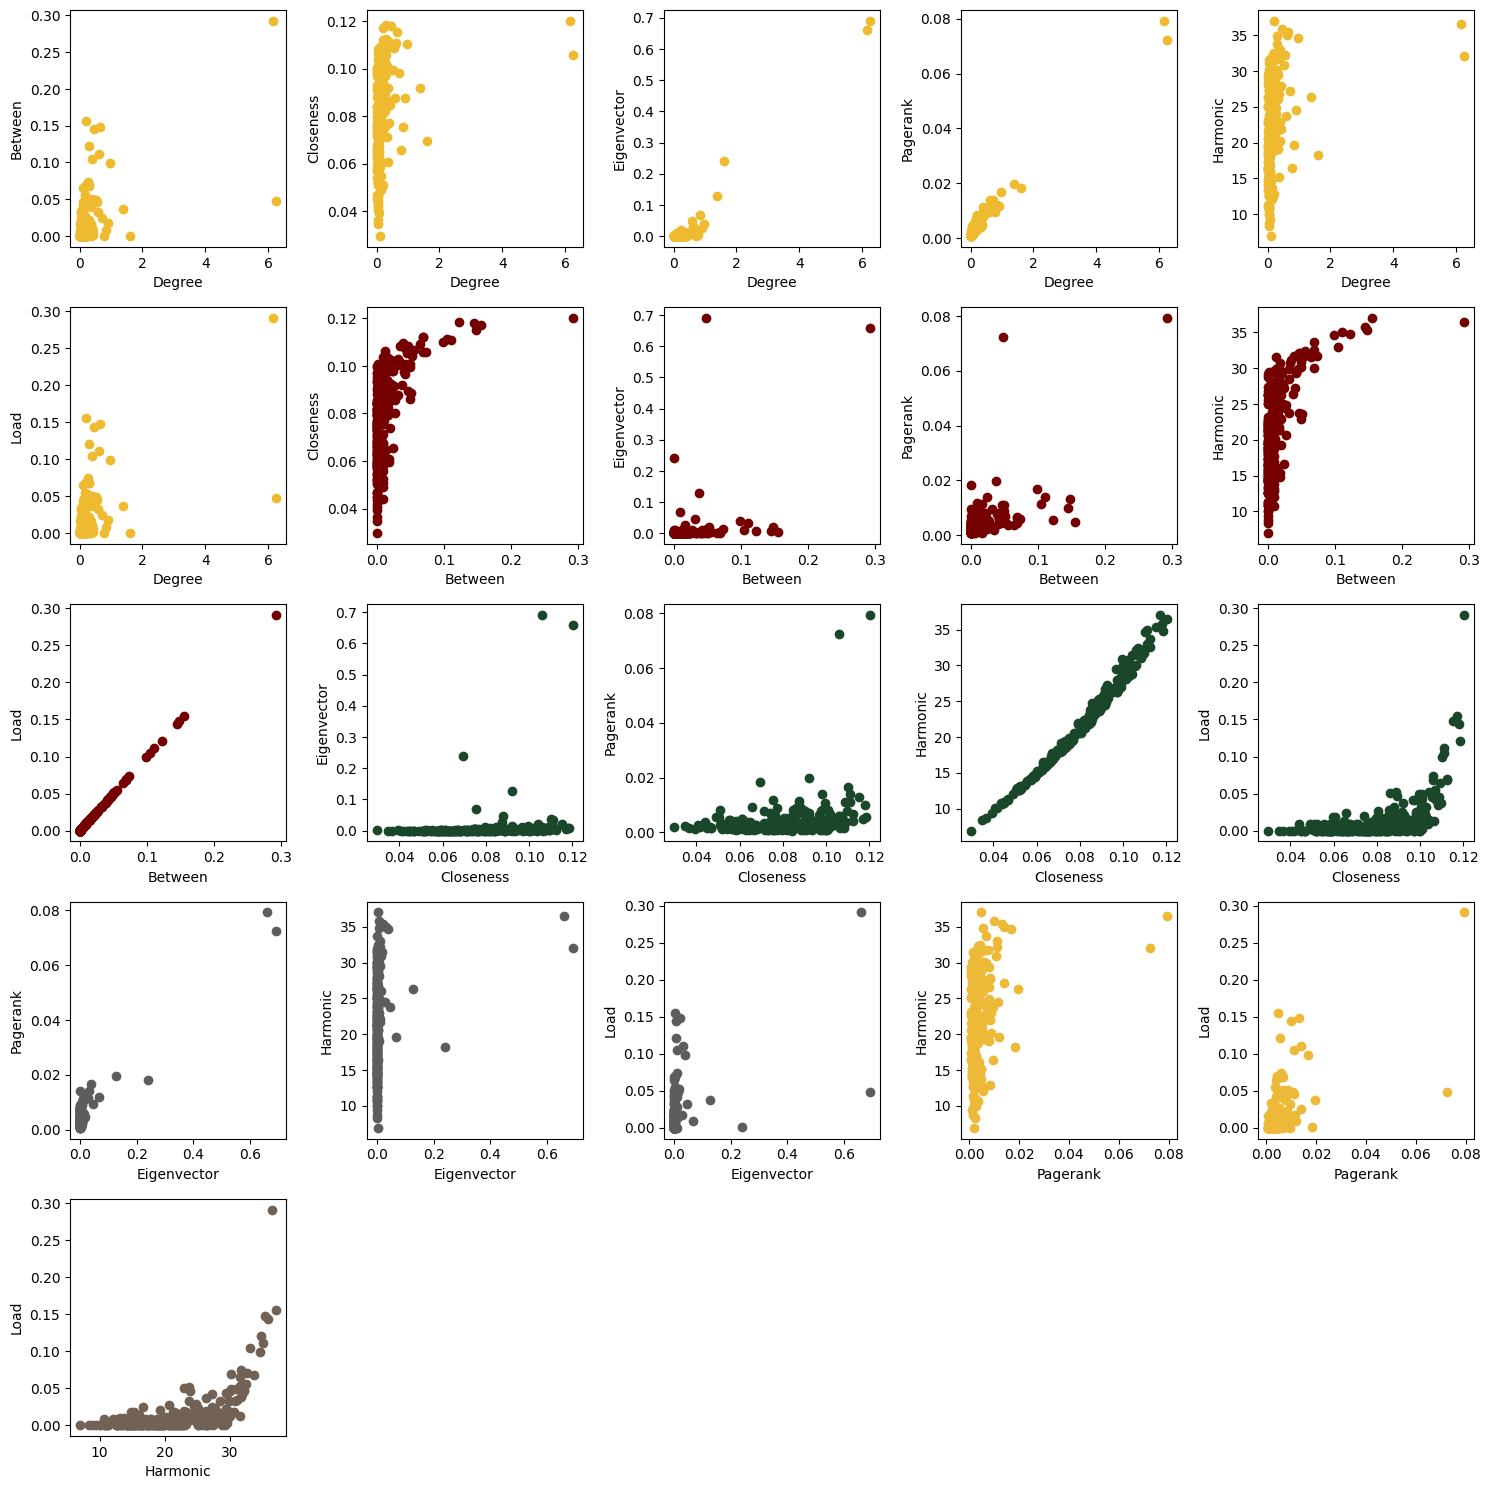

In [ ]:
centrality_measures = {
    'degree': degree_cent,
    'between': betweenness_cent,
    'closeness': closeness_cent,
    'eigenvector': eigenvector_cent,
    'pagerank': pagerank_cent,
    'harmonic': harmonic_cent,
    'load': load_cent
}

centrality_colors = {
    'between': griff_colors[0],
    'degree': griff_colors[2],
    'closeness': slyth_colors[0],
    'eigenvector': slyth_colors[2],
    'pagerank': huff_colors[0],
    'harmonic': huff_colors[2],
    'load': raven_colors[3]
}

nodes = list(degree_cent.keys())
num_measures = len(centrality_measures)

fig, axs = plt.subplots(5, 5, figsize=(15, 15))

comb = list(combinations(centrality_measures.keys(), 2))
for i, (centrality1, centrality2) in enumerate(comb):
    row = i // 5
    col = i % 5
    ax = axs[row, col]

    ax.scatter(
        [centrality_measures[centrality1][node] for node in nodes],
        [centrality_measures[centrality2][node] for node in nodes],
        color=centrality_colors[centrality1]
    )

    ax.set_xlabel(centrality1.capitalize())
    ax.set_ylabel(centrality2.capitalize())

for i in range(len(comb), 25):
    axs[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

Here we can look for **correlations** between the respective measures.

**Identifying the top 10 nodes for each metric**

In [ ]:
top_degree_nodes = sorted(degree_cent, key=degree_cent.get, reverse=True)[:10]
top_betweenness_nodes = sorted(betweenness_cent, key=betweenness_cent.get, reverse=True)[:10]
top_closeness_nodes = sorted(closeness_cent, key=closeness_cent.get, reverse=True)[:10]
top_eigenvector_nodes = sorted(eigenvector_cent, key=eigenvector_cent.get, reverse=True)[:10]
top_pagerank_nodes = sorted(pagerank_cent, key=pagerank_cent.get, reverse=True)[:10]
top_harmonic_nodes = sorted(harmonic_cent, key=harmonic_cent.get, reverse=True)[:10]
top_load_nodes = sorted(load_cent, key=load_cent.get, reverse=True)[:10]

In [ ]:
print("Top 10 nodes based on Degree Centrality:")
print(top_degree_nodes)
print("\nTop 10 nodes based on Betweenness Centrality:")
print(top_betweenness_nodes)
print("\nTop 10 nodes based on Closeness Centrality:")
print(top_closeness_nodes)
print("\nTop 10 nodes based on Eigenvector Centrality:")
print(top_eigenvector_nodes)
print("\nTop 10 nodes based on Pagerank Centrality:")
print(top_pagerank_nodes)
print("\nTop 10 nodes based on Harmonic Centrality:")
print(top_harmonic_nodes)
print("\nTop 10 nodes based on Load Centrality:")
print(top_load_nodes)

Top 10 nodes based on Degree Centrality:
['Dobby', 'Harry Potter', 'Winky', 'Kreacher', 'Hedwig', 'Firenze', 'Griphook', 'Bane', 'Dean Thomas', 'Draco Malfoy']

Top 10 nodes based on Betweenness Centrality:
['Harry Potter', 'Percy Weasley', 'Draco Malfoy', 'Lee Jordan', 'Luna Lovegood', 'Albus Dumbledore', 'Sirius Black', 'Hedwig', 'Ginny Weasley', 'Severus Snape']

Top 10 nodes based on Closeness Centrality:
['Harry Potter', 'Luna Lovegood', 'Lee Jordan', 'Percy Weasley', 'Draco Malfoy', 'Neville Longbottom', 'Severus Snape', 'Sirius Black', 'Albus Dumbledore', 'Hedwig']

Top 10 nodes based on Eigenvector Centrality:
['Dobby', 'Harry Potter', 'Winky', 'Kreacher', 'Griphook', 'Lucius Malfoy', 'Hedwig', 'Albus Dumbledore', 'Firenze', 'Draco Malfoy']

Top 10 nodes based on Pagerank Centrality:
['Harry Potter', 'Dobby', 'Kreacher', 'Winky', 'Hedwig', 'Dean Thomas', 'Albus Dumbledore', 'Draco Malfoy', 'Griphook', 'Firenze']

Top 10 nodes based on Harmonic Centrality:
['Percy Weasley', 'Har

We need to create a new dataframe to store these important nodes based on the centralities.

In [ ]:
import pandas as pd

In [ ]:
cent = {
    'Degree Centrality': top_degree_nodes,
    'Betweenness Centrality': top_betweenness_nodes,
    'Closeness Centrality': top_closeness_nodes,
    'Eigenvector Centrality': top_eigenvector_nodes,
    'Pagerank Centrality': top_pagerank_nodes,
    'Harmonic Centrality': top_harmonic_nodes,
    'Load Centrality': top_load_nodes,
}

important_nodes = pd.DataFrame(cent)

important_nodes.index += 1
important_nodes.index.name = 'Index'

In [ ]:
important_nodes.to_csv('top_nodes_centrality_hp.csv')

In [ ]:
important_nodes

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,Pagerank Centrality,Harmonic Centrality,Load Centrality
Index,,,,,,,
1,Dobby,Harry Potter,Harry Potter,Dobby,Harry Potter,Percy Weasley,Harry Potter
2,Harry Potter,Percy Weasley,Luna Lovegood,Harry Potter,Dobby,Harry Potter,Percy Weasley
3,Winky,Draco Malfoy,Lee Jordan,Winky,Kreacher,Lee Jordan,Draco Malfoy
4,Kreacher,Lee Jordan,Percy Weasley,Kreacher,Winky,Draco Malfoy,Lee Jordan
5,Hedwig,Luna Lovegood,Draco Malfoy,Griphook,Hedwig,Albus Dumbledore,Luna Lovegood
6,Firenze,Albus Dumbledore,Neville Longbottom,Lucius Malfoy,Dean Thomas,Luna Lovegood,Albus Dumbledore
7,Griphook,Sirius Black,Severus Snape,Hedwig,Albus Dumbledore,Hedwig,Sirius Black
8,Bane,Hedwig,Sirius Black,Albus Dumbledore,Draco Malfoy,Neville Longbottom,Hedwig
9,Dean Thomas,Ginny Weasley,Albus Dumbledore,Firenze,Griphook,Sirius Black,Ginny Weasley


When it comes to the top 10 nodes in our Harry Potter network, almost all centrality measures agree on the **Harry Potter** node to be **the most influential node**, which is not surprising, considering he is the main character of the books.

**Dobby** and **Percy Weasley** could be considered all in all the **second most influential** nodes, since they take the first or second place mostly at every centrality measure.

We find it surprising that **Hermione** and **Ron** do not really appear as influential nodes.

------------------------------------------------------------------------------------------------------------------------

Now, we can **visualize the network** based on different centrality measures.

On these plots, the nodes are **colored** based on the value of the measures.

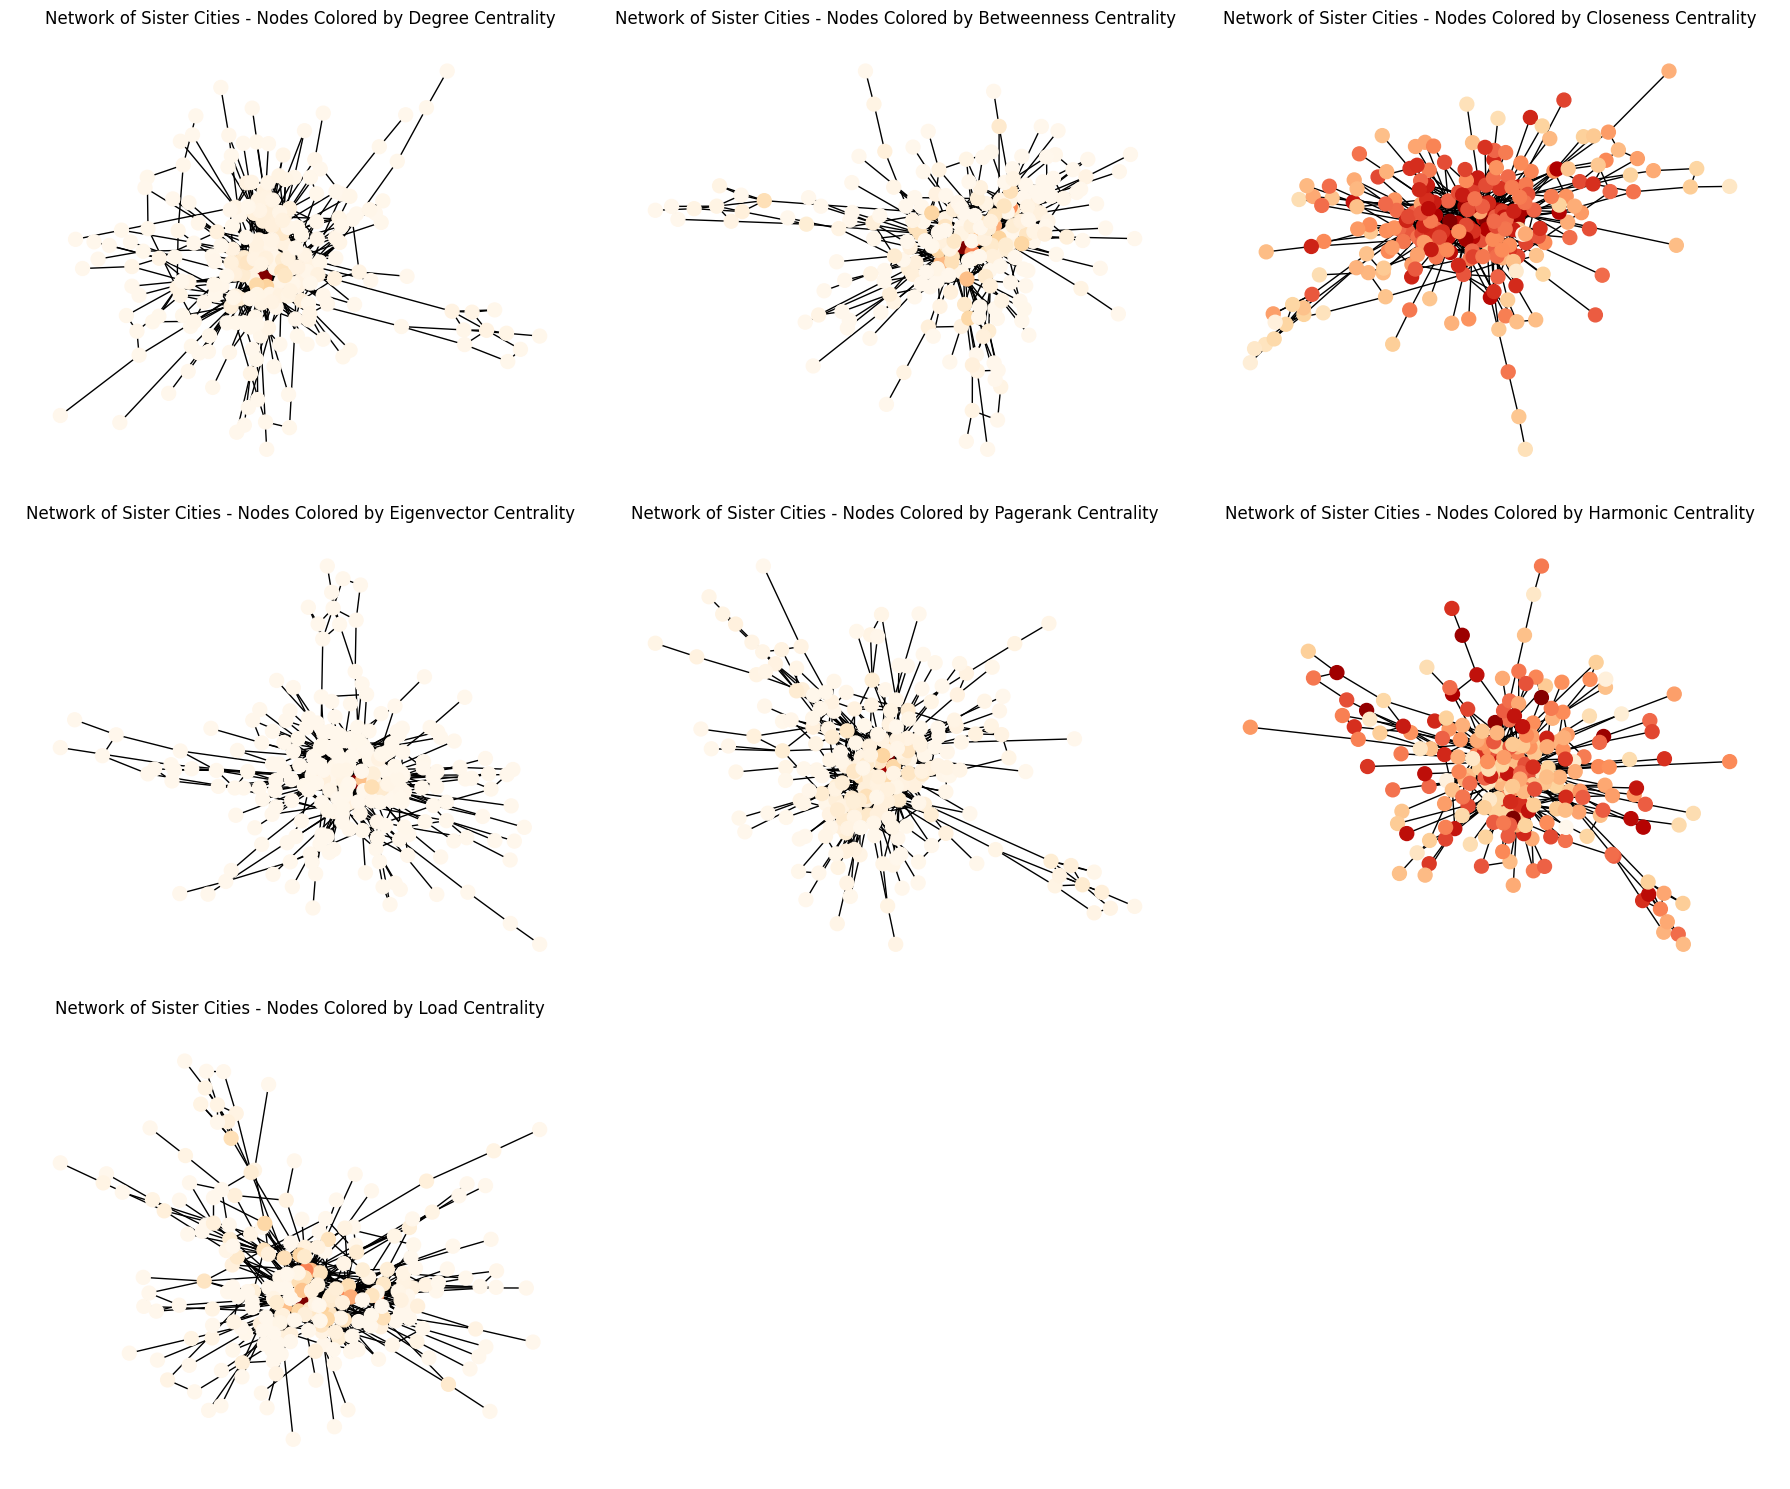

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(18, 15))

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[0, 0], node_color=list(degree_cent.values()), cmap=plt.cm.OrRd, node_size=100)
axs[0, 0].set_title('Network of Sister Cities - Nodes Colored by Degree Centrality')

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[0, 1], node_color=list(betweenness_cent.values()), cmap=plt.cm.OrRd, node_size=100)
axs[0, 1].set_title('Network of Sister Cities - Nodes Colored by Betweenness Centrality')

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[0, 2], node_color=list(closeness_cent.values()), cmap=plt.cm.OrRd, node_size=100)
axs[0, 2].set_title('Network of Sister Cities - Nodes Colored by Closeness Centrality')

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[1, 0], node_color=list(eigenvector_cent.values()), cmap=plt.cm.OrRd, node_size=100)
axs[1, 0].set_title('Network of Sister Cities - Nodes Colored by Eigenvector Centrality')

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[1, 1], node_color=list(pagerank_cent.values()), cmap=plt.cm.OrRd, node_size=100)
axs[1, 1].set_title('Network of Sister Cities - Nodes Colored by Pagerank Centrality')

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[1, 2], node_color=list(harmonic_cent.values()), cmap=plt.cm.OrRd, node_size=100)
axs[1, 2].set_title('Network of Sister Cities - Nodes Colored by Harmonic Centrality')

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[2, 0], node_color=list(load_cent.values()), cmap=plt.cm.OrRd, node_size=100)
axs[2, 0].set_title('Network of Sister Cities - Nodes Colored by Load Centrality')

for i in range(2,3):
    for j in range(1,3):
        axs[i, j].set_visible(False)

plt.tight_layout()
plt.show()

On these plots, the nodes are **sized** based on the value of the measures.

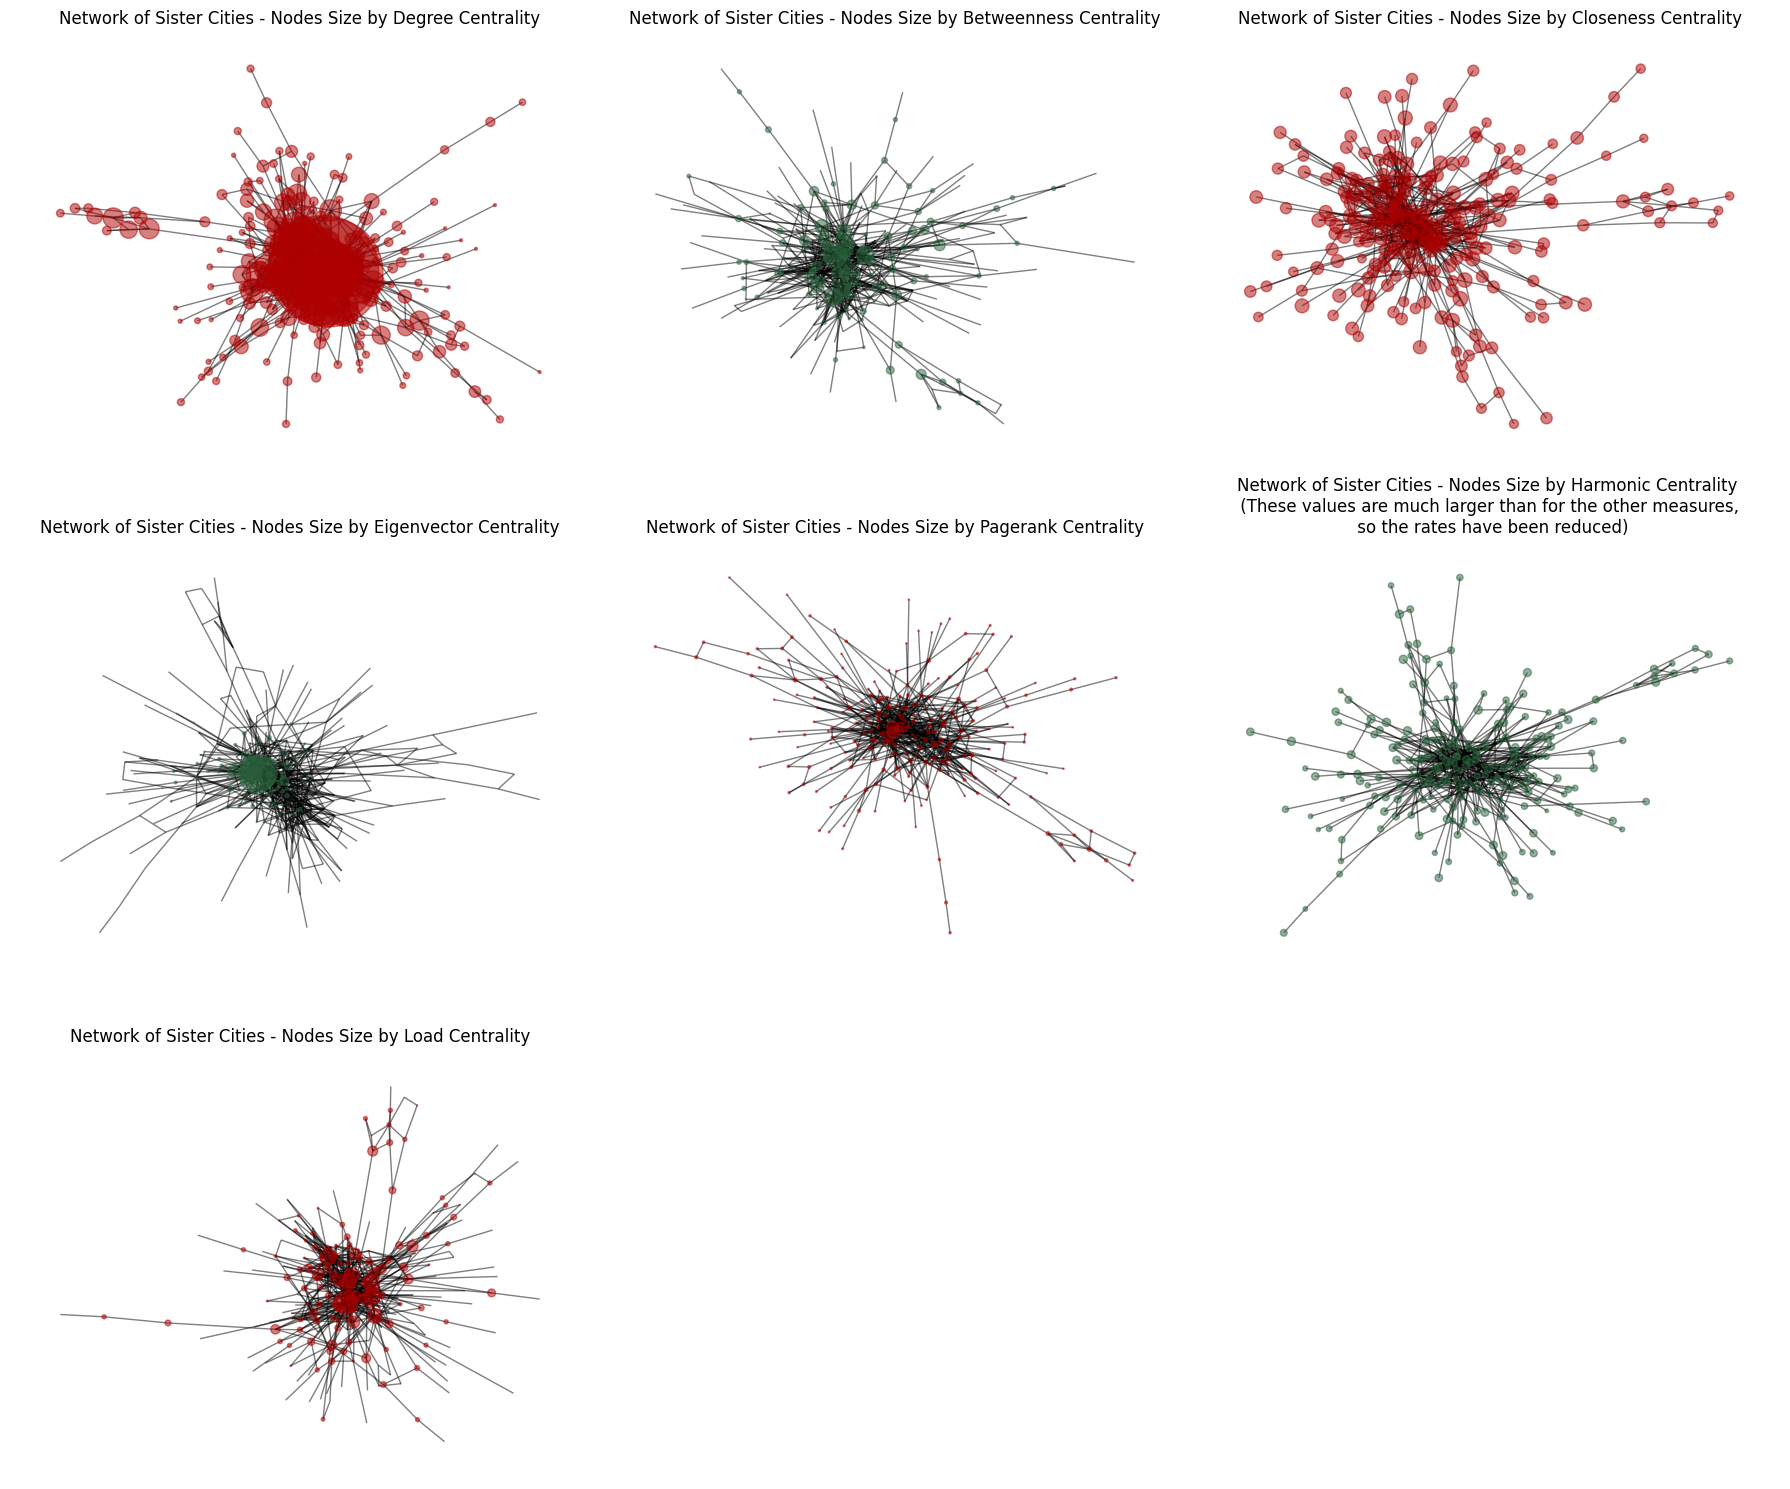

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(18, 15))

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[0, 0], node_color=griff_colors[1], alpha=0.5, node_size=[v * 1000 for v in degree_cent.values()])
axs[0, 0].set_title('Network of Sister Cities - Nodes Size by Degree Centrality')

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[0, 1], node_color=slyth_colors[1], alpha=0.5, node_size=[v * 1000 for v in betweenness_cent.values()])
axs[0, 1].set_title('Network of Sister Cities - Nodes Size by Betweenness Centrality')

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[0, 2], node_color=griff_colors[1], alpha=0.5, node_size=[v * 1000 for v in closeness_cent.values()])
axs[0, 2].set_title('Network of Sister Cities - Nodes Size by Closeness Centrality')

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[1, 0], node_color=slyth_colors[1], alpha=0.5, node_size=[v * 1000 for v in eigenvector_cent.values()])
axs[1, 0].set_title('Network of Sister Cities - Nodes Size by Eigenvector Centrality')

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[1, 1], node_color=griff_colors[1], alpha=0.5, node_size=[v * 1000 for v in pagerank_cent.values()])
axs[1, 1].set_title('Network of Sister Cities - Nodes Size by Pagerank Centrality')

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[1, 2], node_color=slyth_colors[1], alpha=0.5, node_size=[v for v in harmonic_cent.values()])
axs[1, 2].set_title('Network of Sister Cities - Nodes Size by Harmonic Centrality \n (These values are much larger than for the other measures, \n so the rates have been reduced)')

nx.draw(HPC, pos=nx.spring_layout(HPC), ax=axs[2, 0], node_color=griff_colors[1], alpha=0.5, node_size=[v * 1000 for v in load_cent.values()])
axs[2, 0].set_title('Network of Sister Cities - Nodes Size by Load Centrality')

for i in range(2,3):
    for j in range(1,3):
        axs[i, j].set_visible(False)

plt.tight_layout()
plt.show()

## **5. Network Visualizations**

The goal is to visualize the whole network  HPC based on different centrality measures. In some cases, it is necessary to change the ratios, so that the nodes are more easily visible.

In [ ]:
!pip install pyvis
from pyvis.network import Network

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.3 MB/s eta 0:00:00


In [ ]:
net = Network(notebook=True, width="100vw", height="100vh", bgcolor='#000000', font_color="white", cdn_resources='in_line')
nx.set_node_attributes(HPC, {node: degree * 100 for node, degree in degree_cent.items()}, "size")
nx.set_node_attributes(HPC, slyth_colors[1], "color")
net.from_nx(HPC)
net.show("harry_potter_degree.html")

harry_potter_degree.html


In [ ]:
net = Network(notebook=True, width="100vw", height="100vh", bgcolor='#000000', font_color="white", cdn_resources='in_line')
nx.set_node_attributes(HPC, {node: degree * 100 for node, degree in betweenness_cent.items()}, "size")
nx.set_node_attributes(HPC, griff_colors[1], "color")
net.from_nx(HPC)
net.show("harry_potter_betweenness.html")

harry_potter_betweenness.html


In [ ]:
net = Network(notebook=True, width="100vw", height="100vh", bgcolor='#000000', font_color="white", cdn_resources='in_line')
nx.set_node_attributes(HPC, {node: degree * 100 for node, degree in closeness_cent.items()}, "size")
nx.set_node_attributes(HPC, raven_colors[1], "color")
net.from_nx(HPC)
net.show("harry_potter_closeness.html")

harry_potter_closeness.html


In [ ]:
net = Network(notebook=True, width="100vw", height="100vh", bgcolor='#000000', font_color="white", cdn_resources='in_line')
nx.set_node_attributes(HPC, {node: degree * 100 for node, degree in eigenvector_cent.items()}, "size")
nx.set_node_attributes(HPC, huff_colors[1], "color")
net.from_nx(HPC)
net.show("harry_potter_eigenvector.html")

harry_potter_eigenvector.html


In [ ]:
net = Network(notebook=True, width="100vw", height="100vh", bgcolor='#000000', font_color="white", cdn_resources='in_line')
nx.set_node_attributes(HPC, {node: degree * 1000 for node, degree in pagerank_cent.items()}, "size")
nx.set_node_attributes(HPC, slyth_colors[3], "color")
net.from_nx(HPC)
net.show("harry_potter_pagerank.html")

harry_potter_pagerank.html


In [ ]:
net = Network(notebook=True, width="100vw", height="100vh", bgcolor='#000000', font_color="white", cdn_resources='in_line')
nx.set_node_attributes(HPC, {node: degree for node, degree in harmonic_cent.items()}, "size")
nx.set_node_attributes(HPC, griff_colors[3], "color")
net.from_nx(HPC)
net.show("harry_potter_harmonic.html")

harry_potter_harmonic.html


In [ ]:
net = Network(notebook=True, width="100vw", height="100vh", bgcolor='#000000', font_color="white", cdn_resources='in_line')
nx.set_node_attributes(HPC, {node: degree * 100 for node, degree in load_cent.items()}, "size")
nx.set_node_attributes(HPC, raven_colors[3], "color")
net.from_nx(HPC)
net.show("harry_potter_load.html")

harry_potter_load.html
